In [1]:
print('hello')

hello


Импортируем необходимые библиотеки

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as py
import plotly.offline
import datetime as date


Скачиваем ранее загруженный в Gitlab датасет

In [23]:
url = 'https://raw.githubusercontent.com/UncLU/midtermassessment/main/dataset_tk.csv'
df = pd.read_csv(url)

Редактируем датасет, задаем имя стобцу с датами

In [24]:
df.columns = ['Dates']+list(df.columns[1:])
df.Dates = df.Dates.apply(lambda x: x.split()[0])
df.Dates = pd.to_datetime(df['Dates'], format='%d/%m/%Y')

df.set_index('Dates', inplace=True)

Выводим информацию по таблице

In [26]:
df.columns[1:]

Index(['Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand', 'HP', 'J&K',
       'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP', 'Maharashtra', 'Goa',
       'DNH', 'Andhra Pradesh', 'Telangana', 'Karnataka', 'Kerala',
       'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand', 'Odisha', 'West Bengal',
       'Sikkim', 'Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Tripura'],
      dtype='object')

Выводим первых 5 строк датасета

In [11]:
df.head(5)

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,Date
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4,2019-01-02
2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6,2019-01-03
2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,...,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5,2019-01-04
2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,...,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5,2019-01-05
2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,...,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3,2019-01-06


выводим инфоомацию по датасету.
Из полученной информации видно что строки не сожержат пустые значения



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2019-01-02 to 2020-12-05
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Punjab             503 non-null    float64
 1   Haryana            503 non-null    float64
 2   Rajasthan          503 non-null    float64
 3   Delhi              503 non-null    float64
 4   UP                 503 non-null    float64
 5   Uttarakhand        503 non-null    float64
 6   HP                 503 non-null    float64
 7   J&K                503 non-null    float64
 8   Chandigarh         503 non-null    float64
 9   Chhattisgarh       503 non-null    float64
 10  Gujarat            503 non-null    float64
 11  MP                 503 non-null    float64
 12  Maharashtra        503 non-null    float64
 13  Goa                503 non-null    float64
 14  DNH                503 non-null    float64
 15  Andhra Pradesh     503 non-null    float64
 16  Telanga

Выводим блочную диаграмм из нее видно, что есть выбрросы

<Axes: >

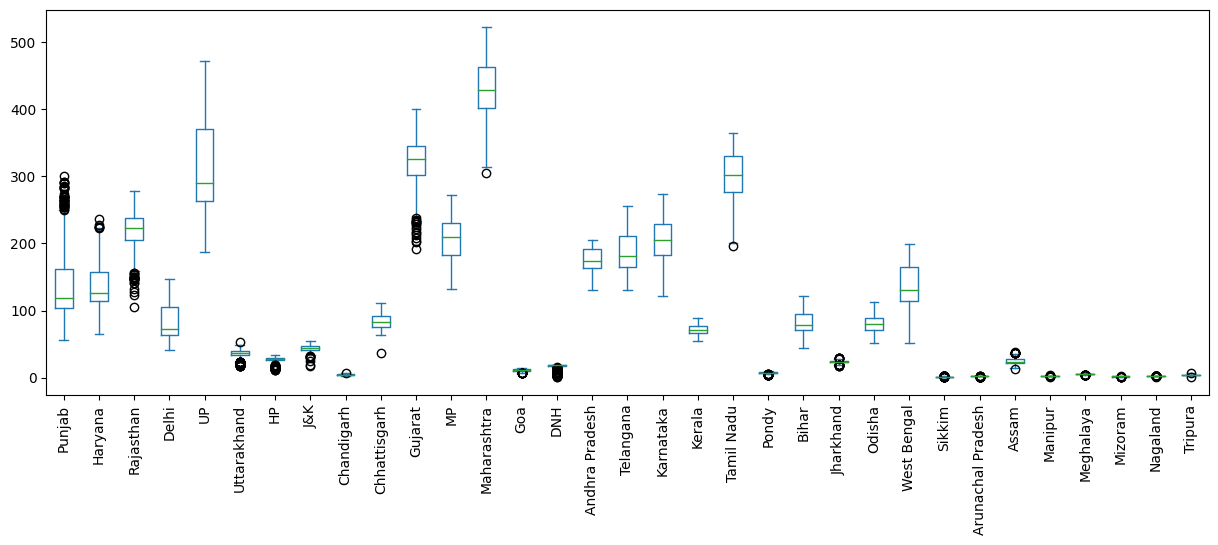

In [13]:
df.plot(kind='box', figsize=(15,5), rot=90)

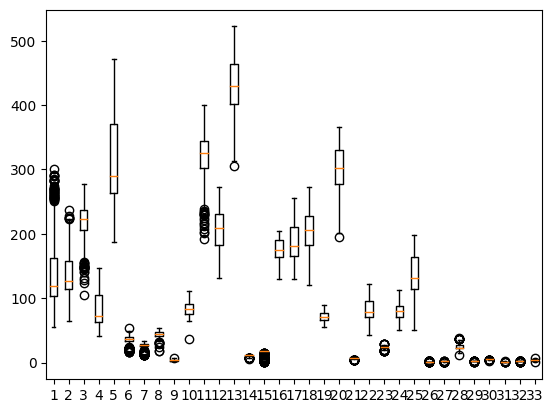

In [27]:
plt.boxplot(df);

In [28]:
from scipy.stats import zscore

df = df[(np.abs(zscore(df)) < 3).all(axis=1)]

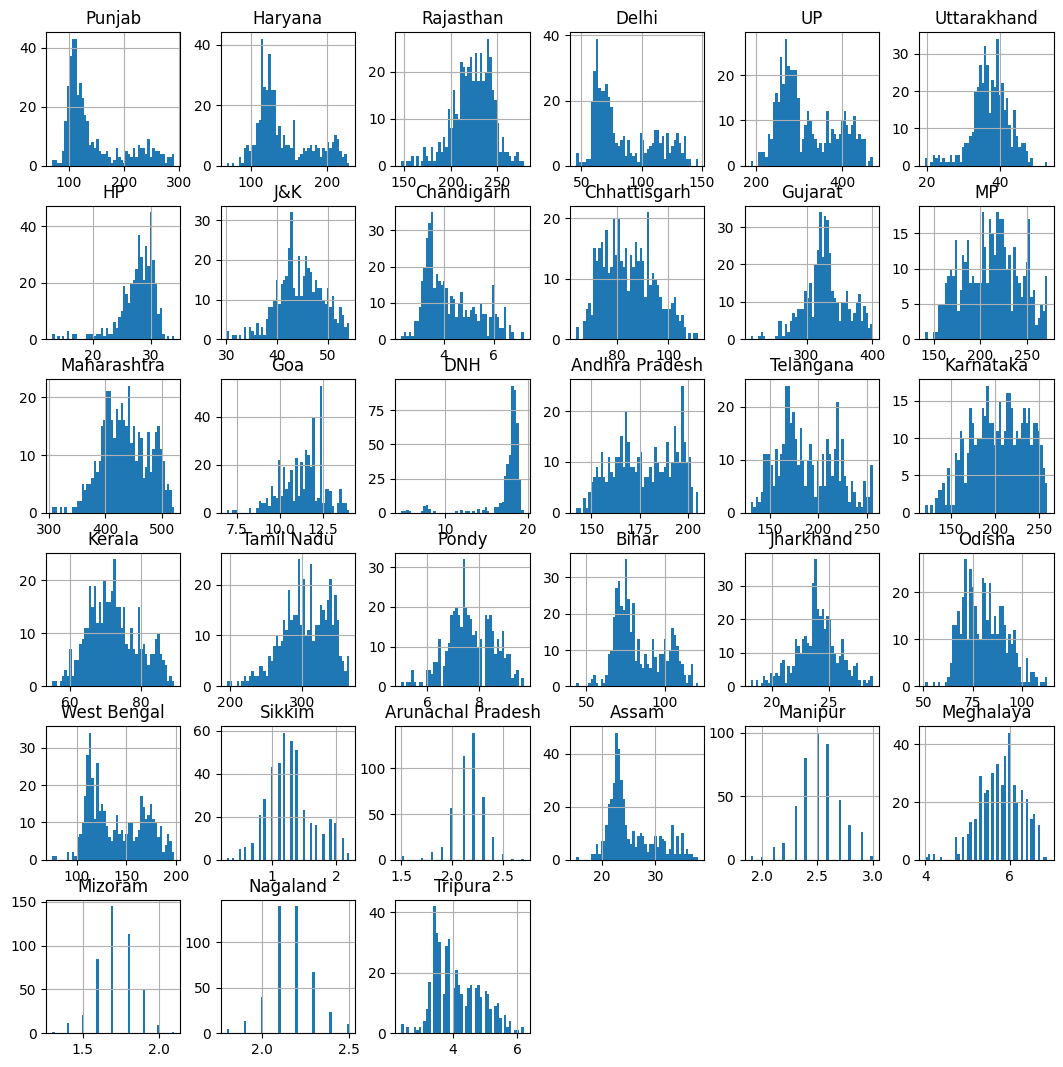

In [29]:
df.hist(bins=50, figsize=(13,13));

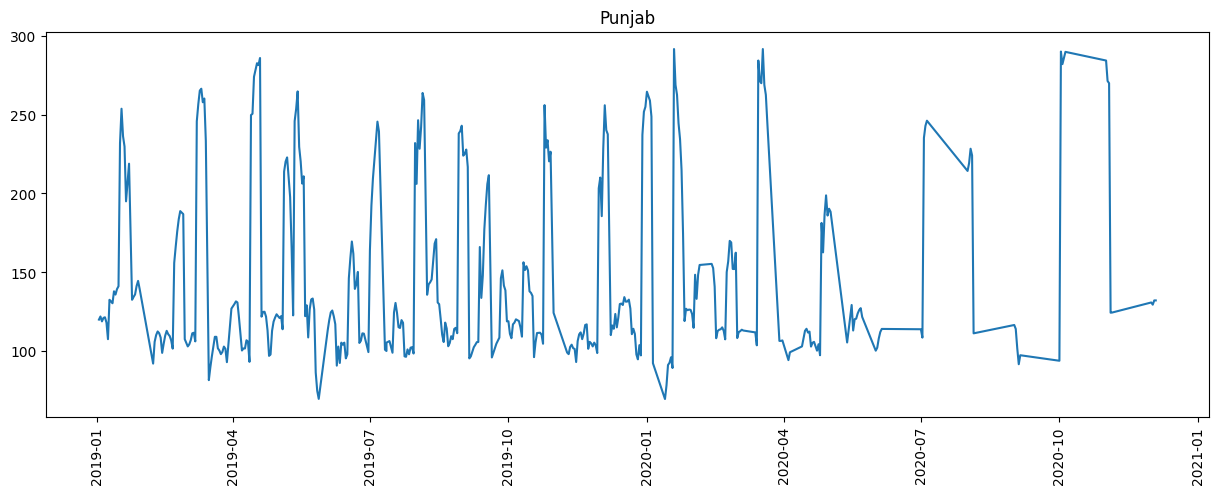

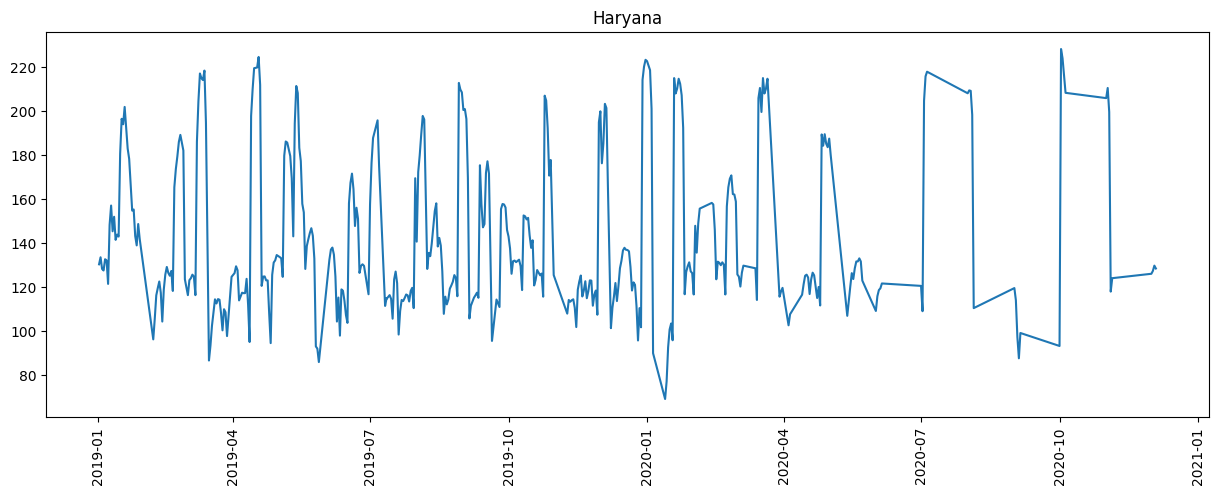

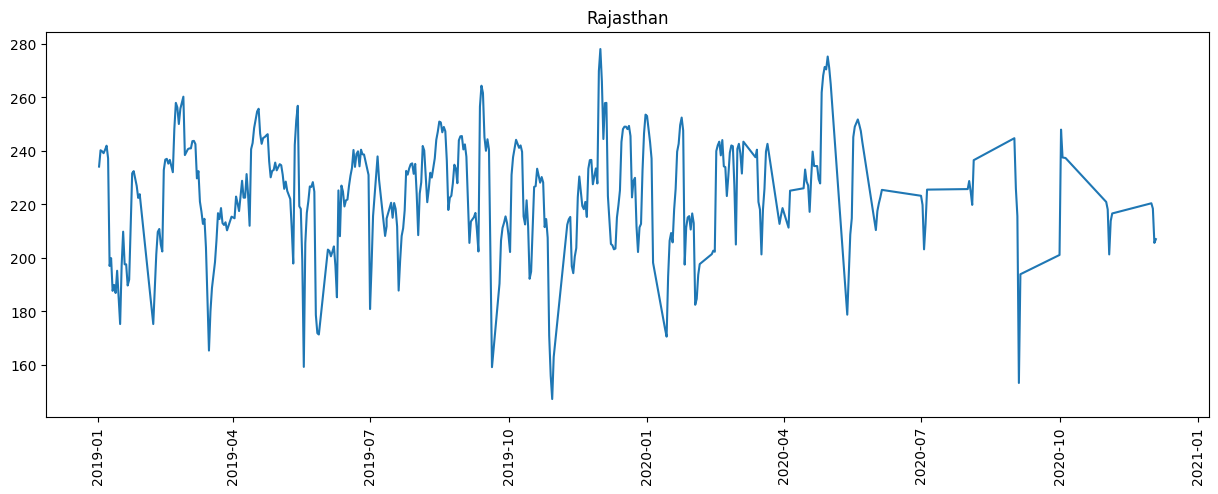

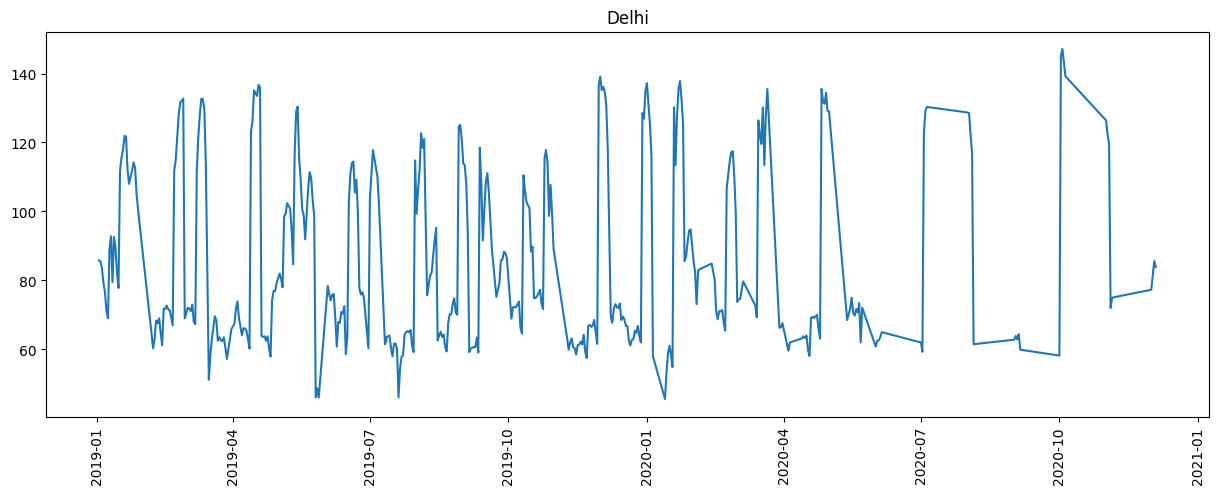

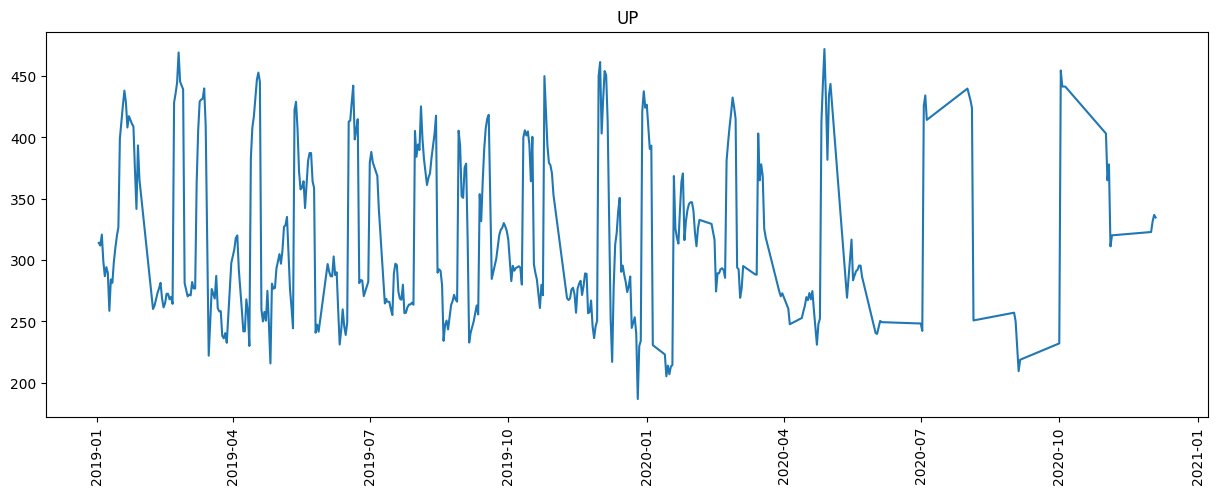

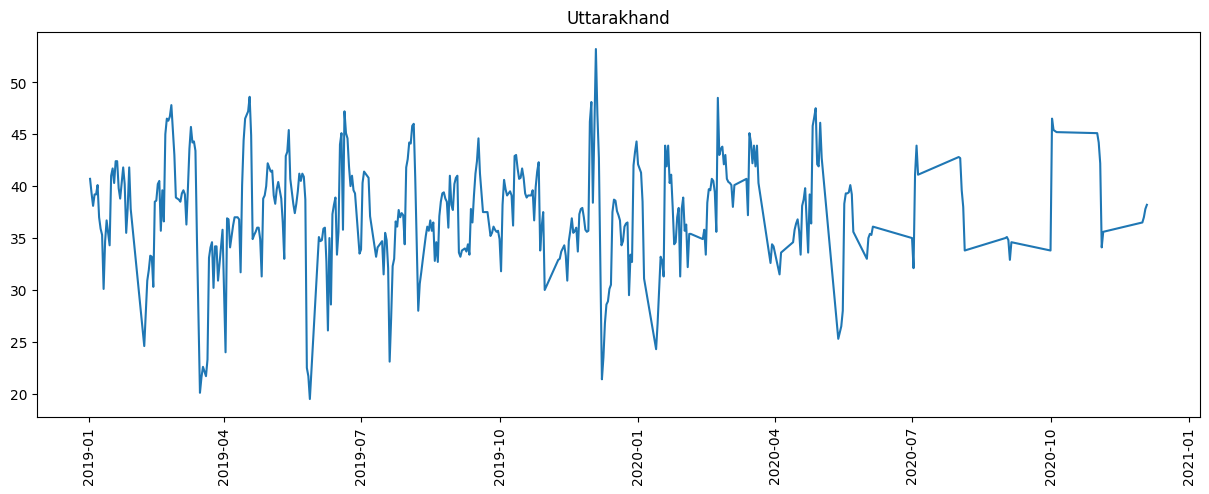

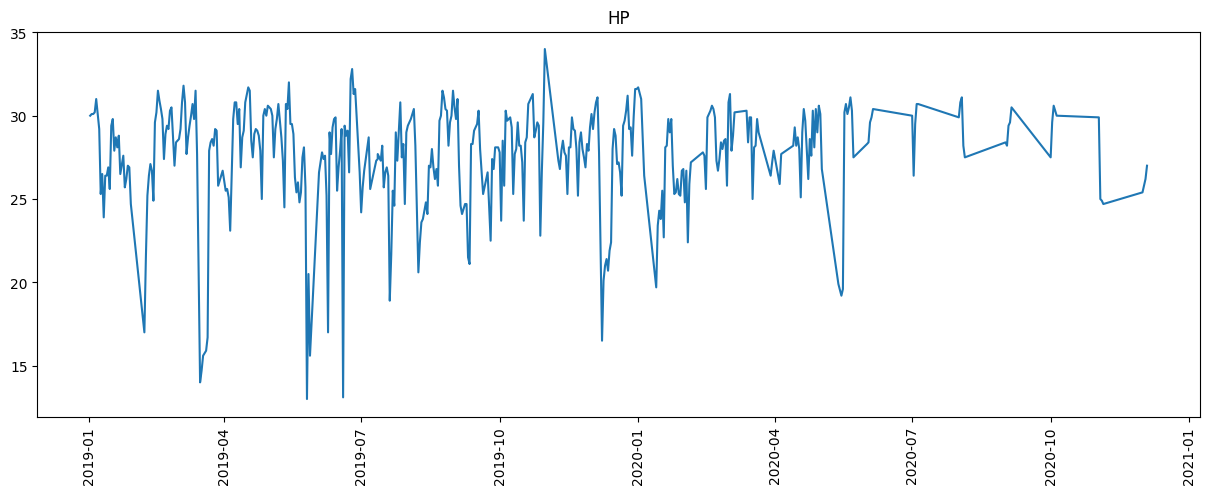

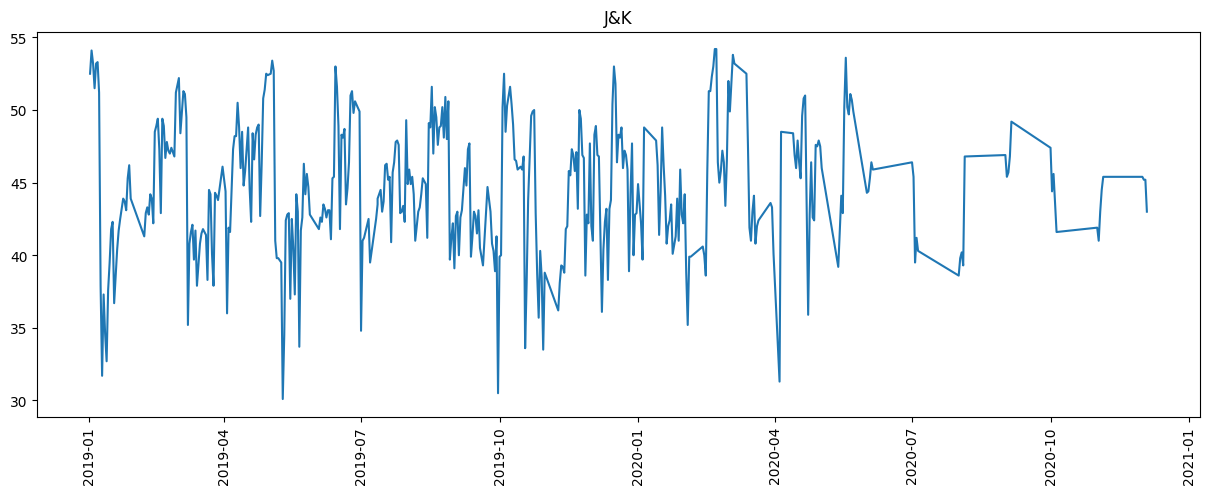

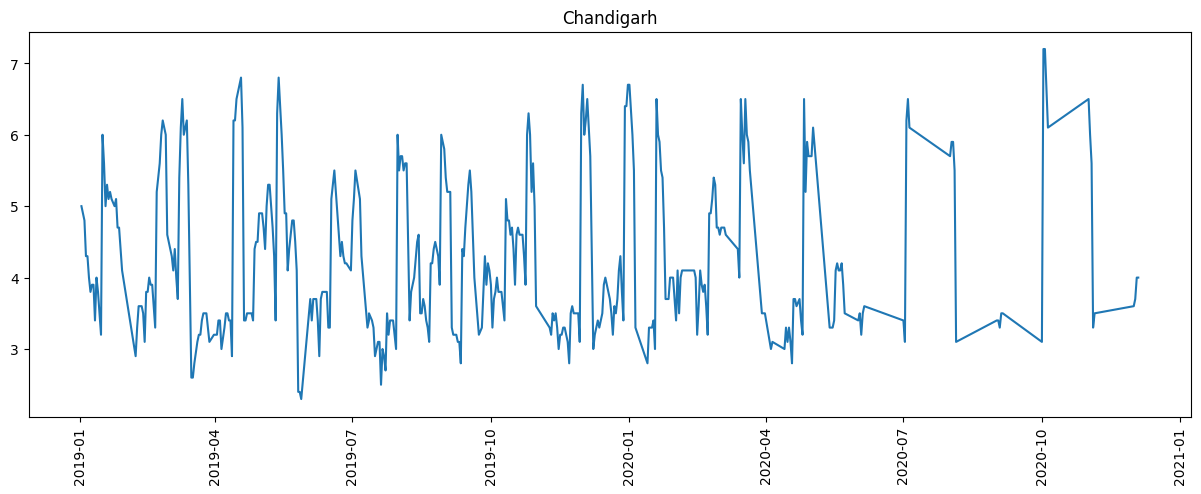

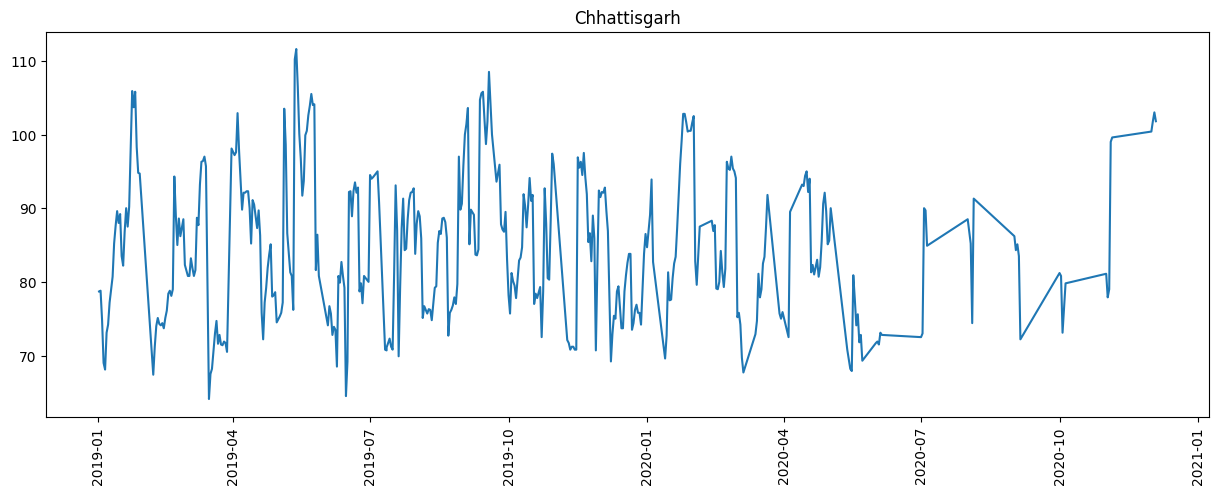

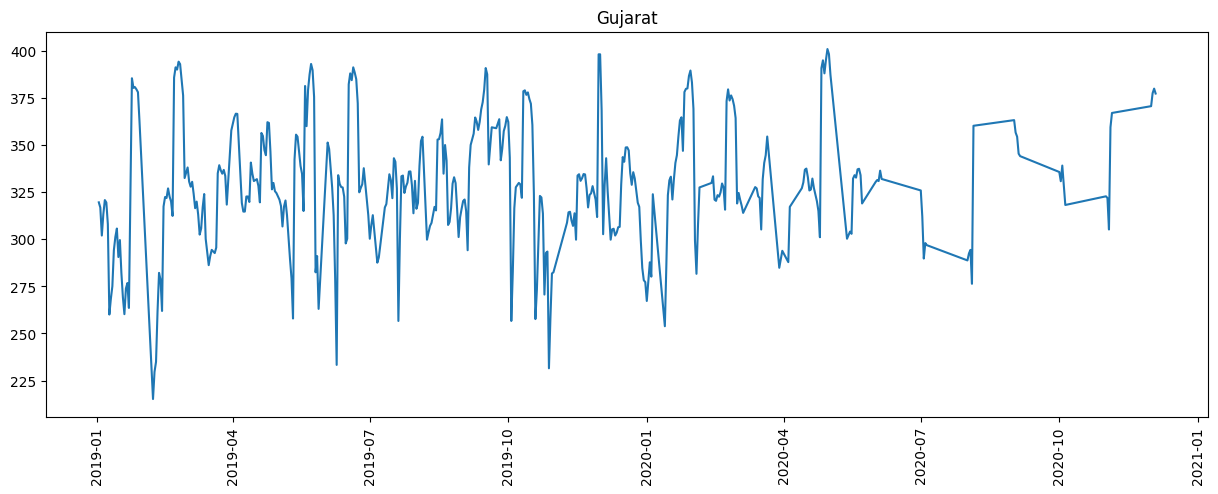

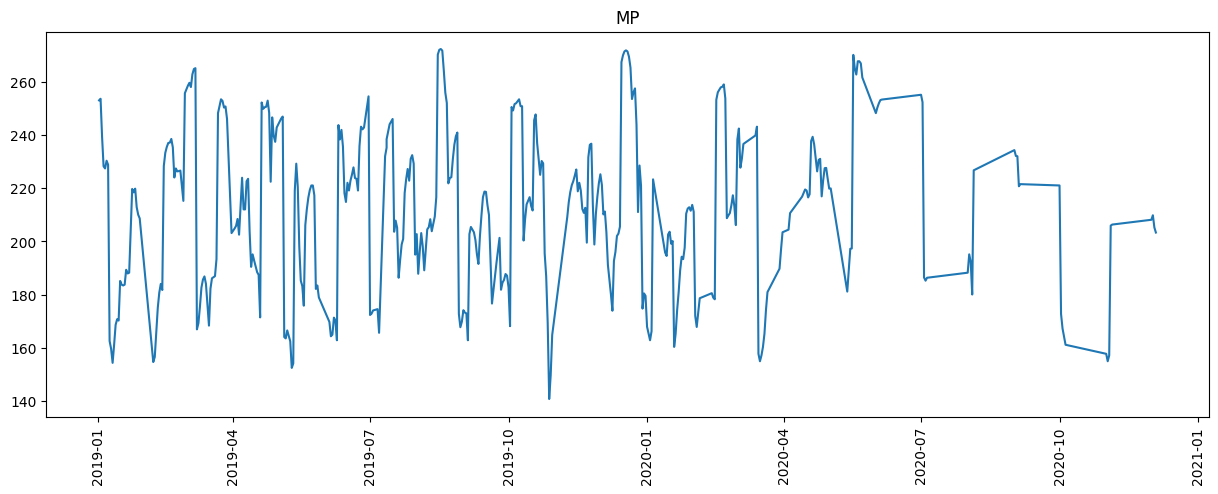

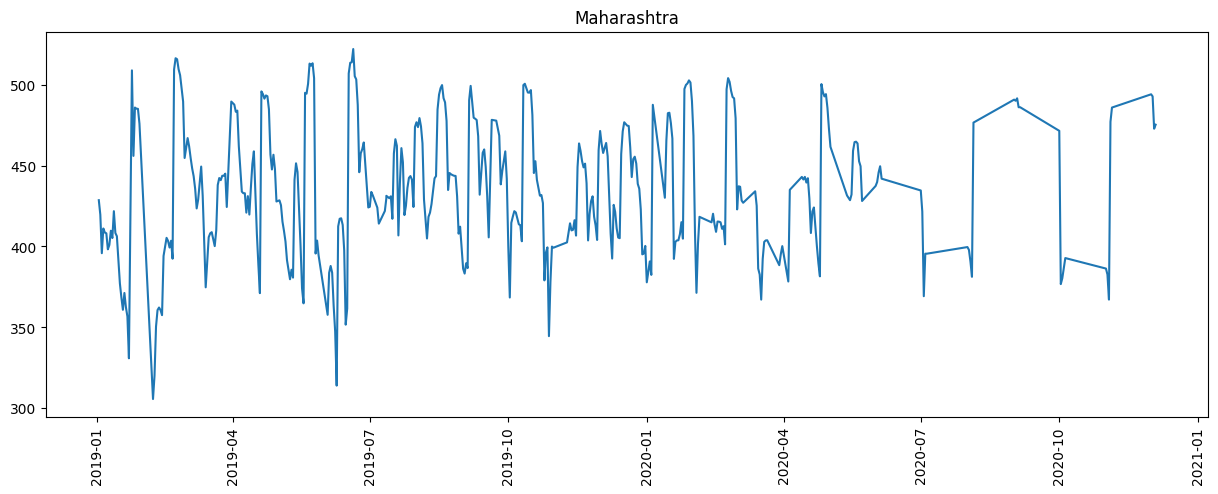

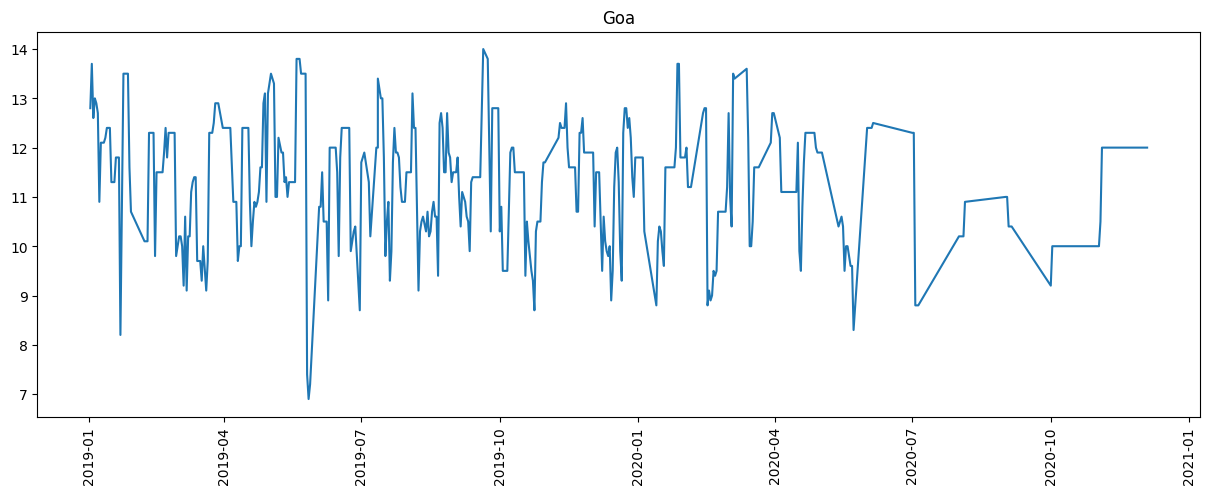

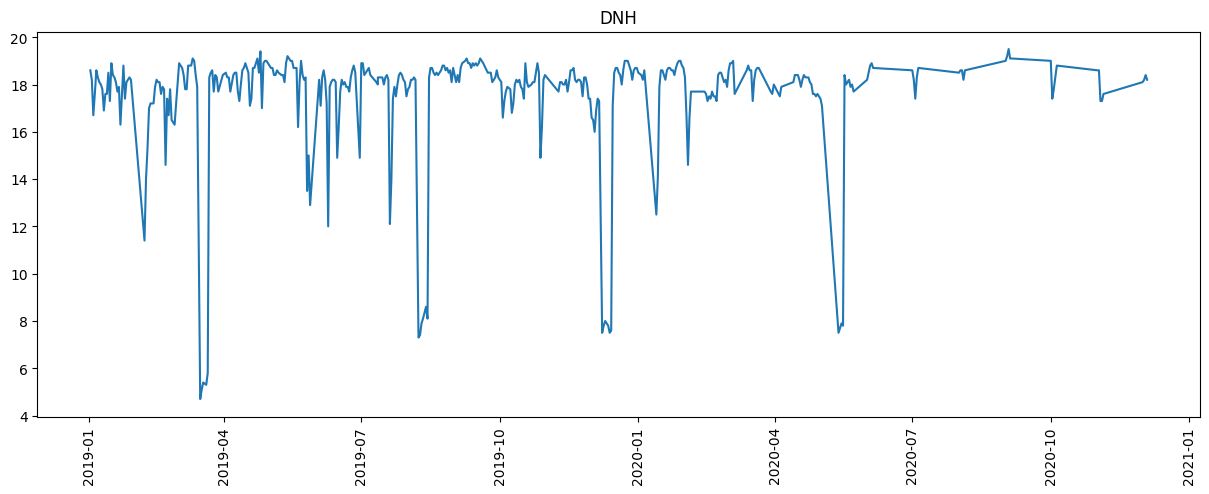

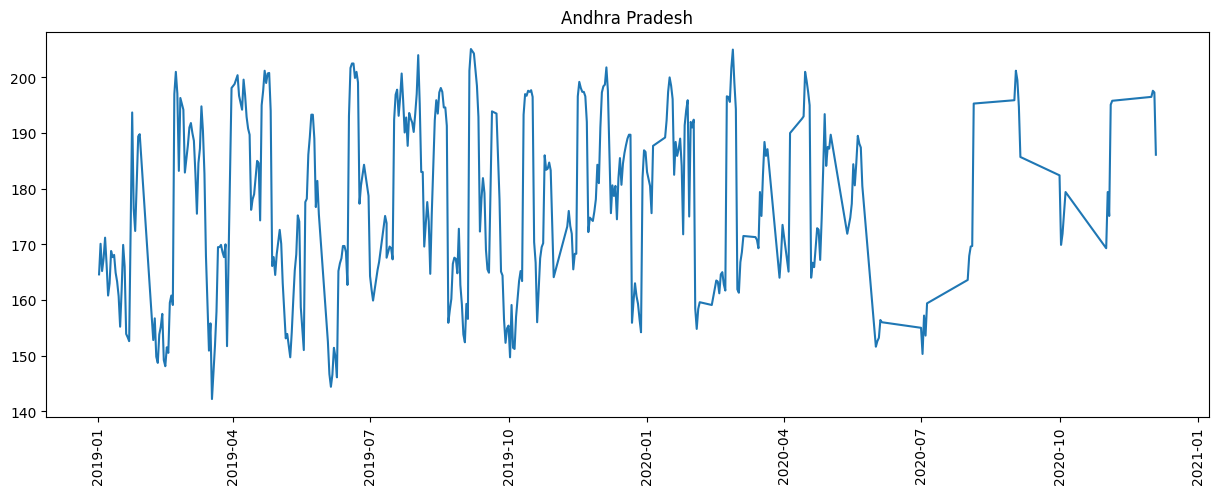

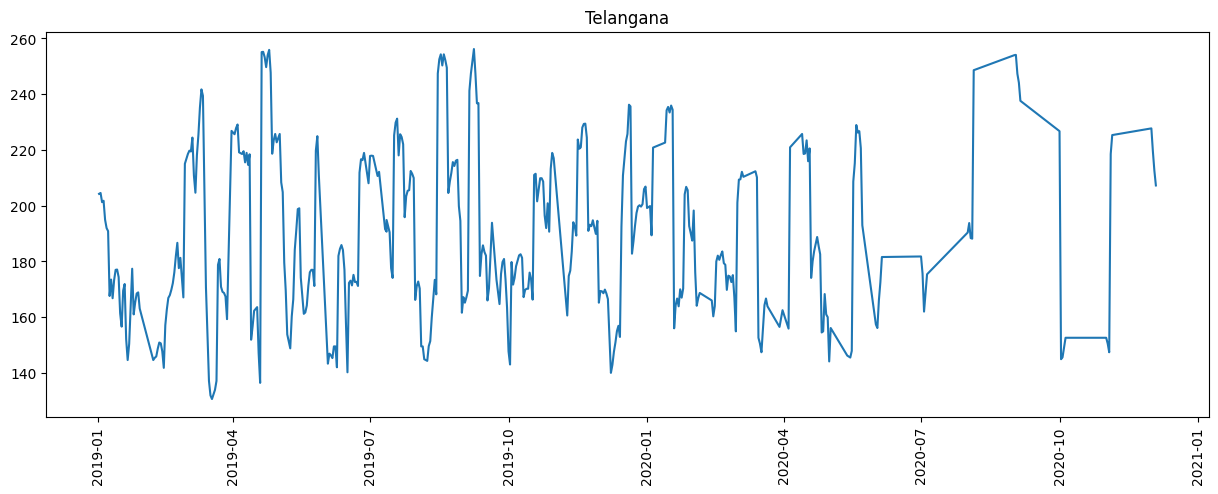

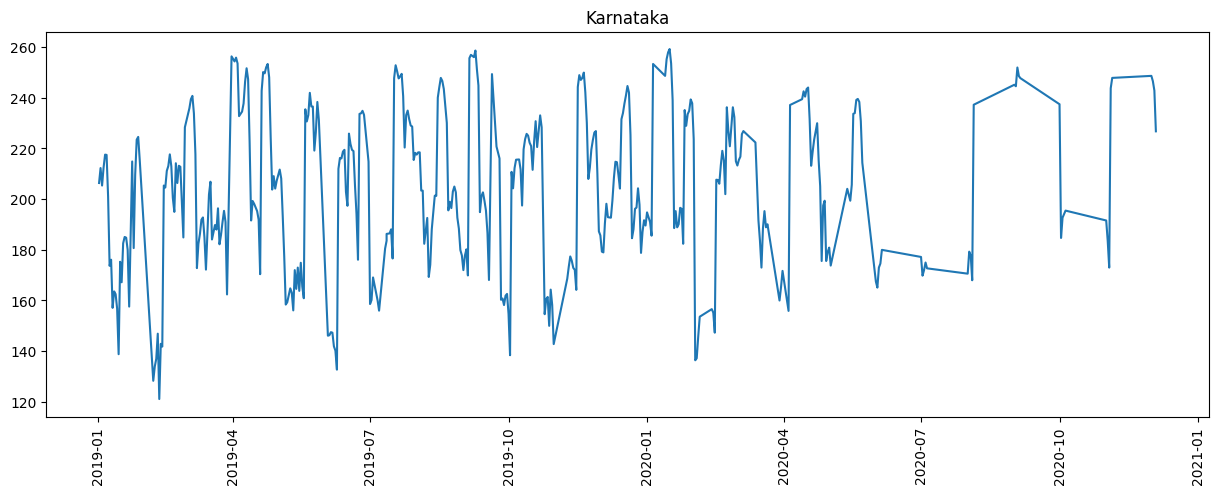

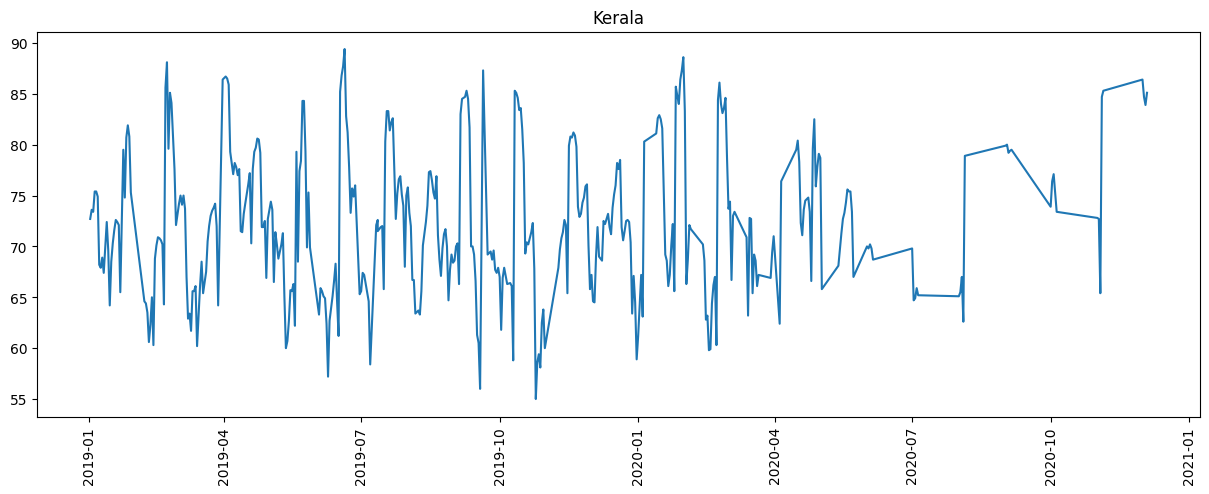

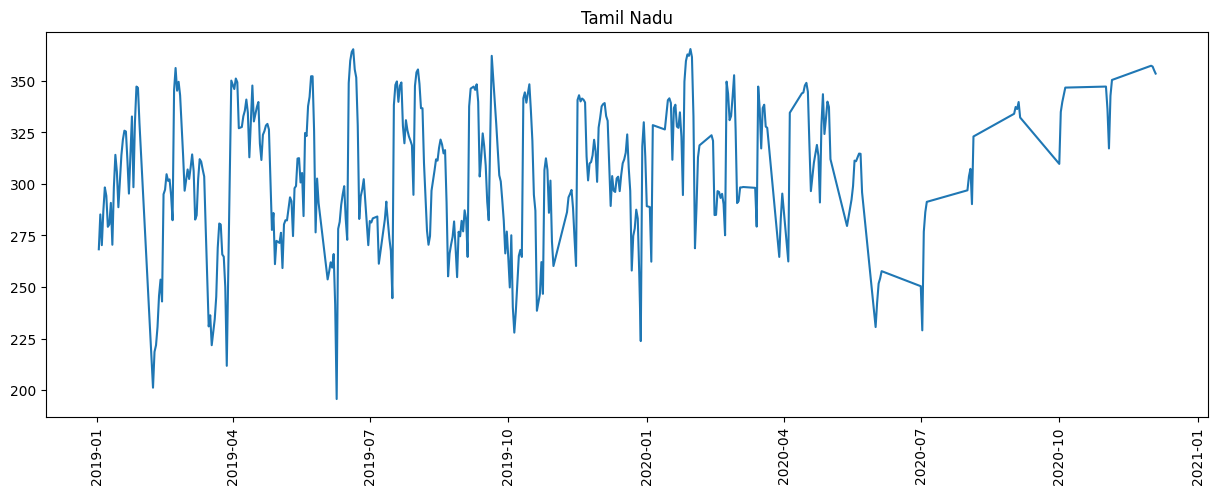

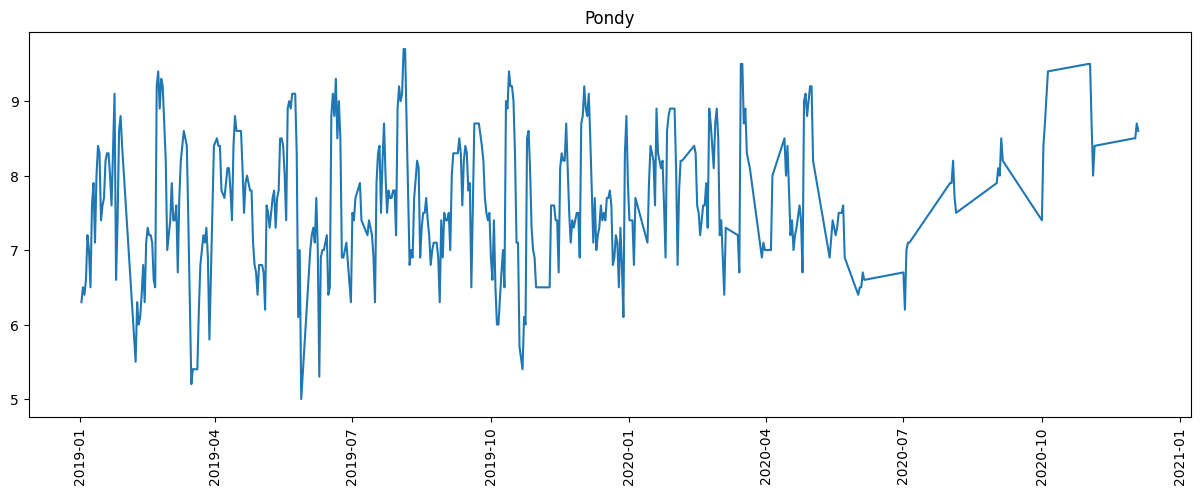

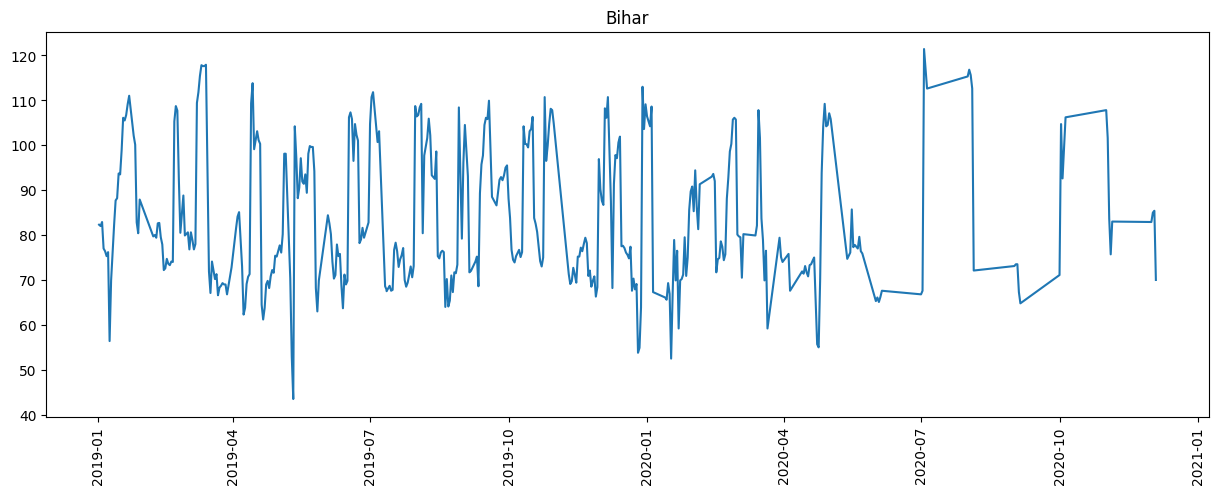

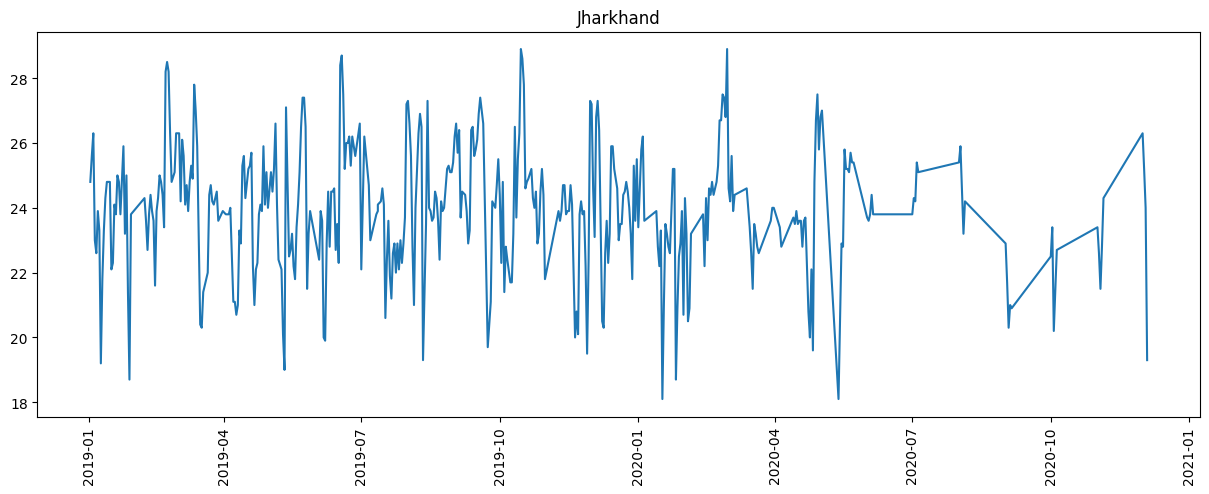

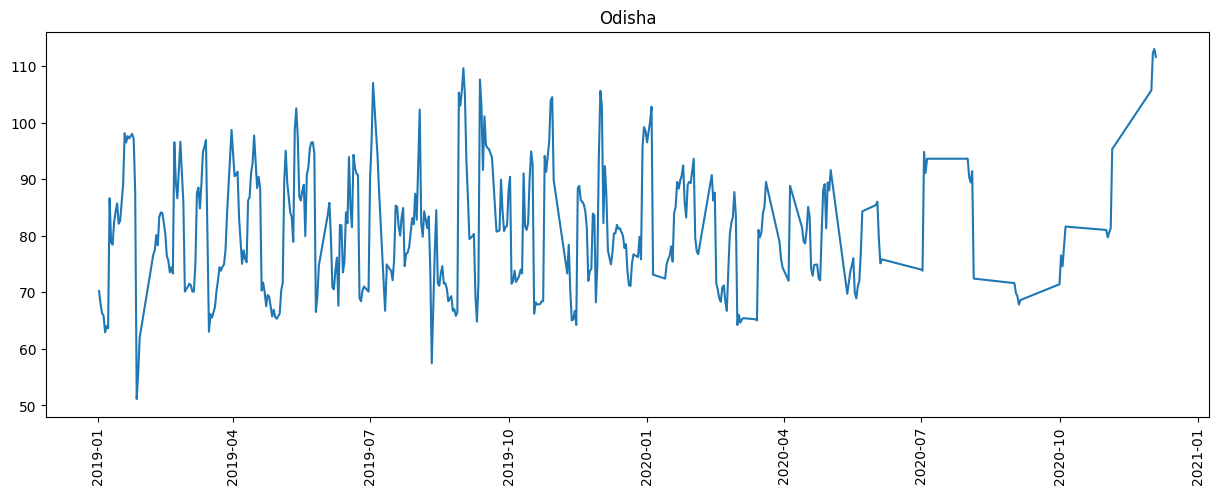

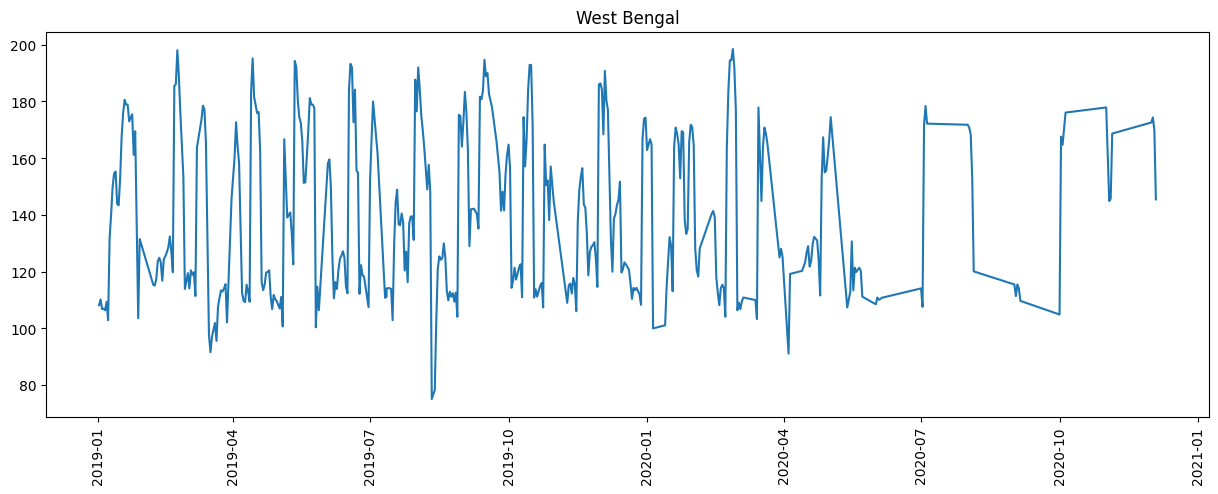

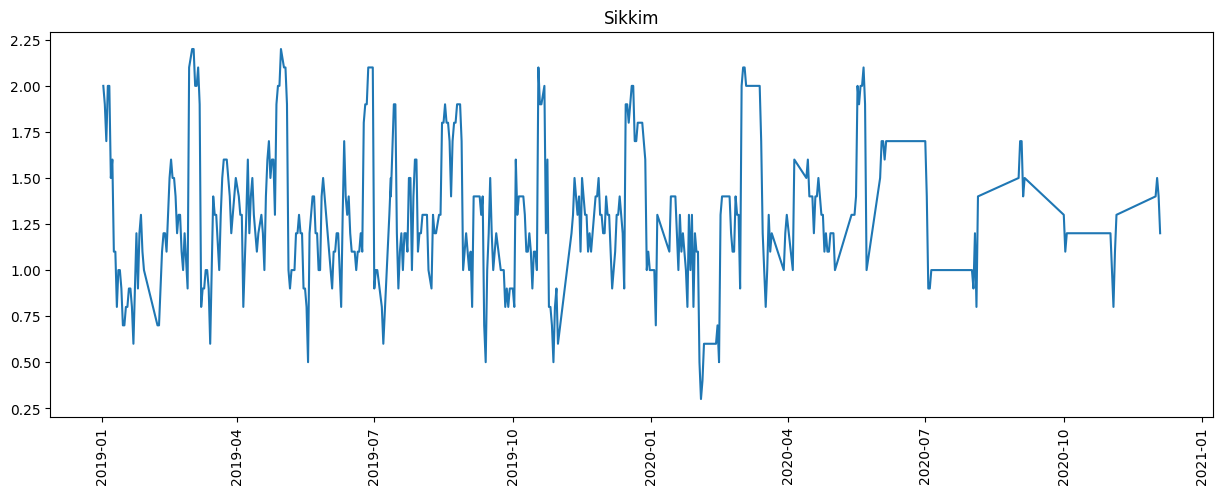

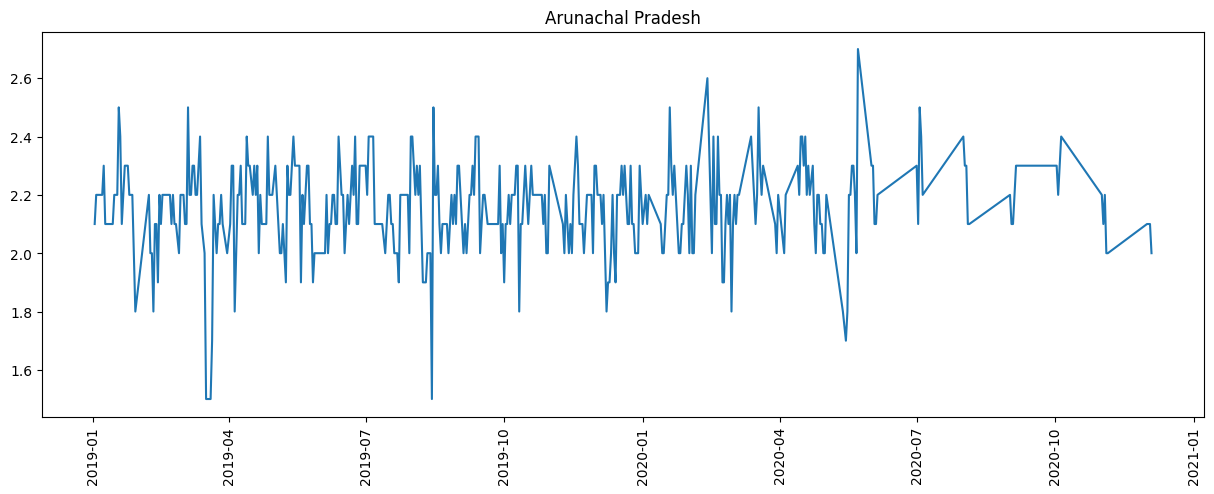

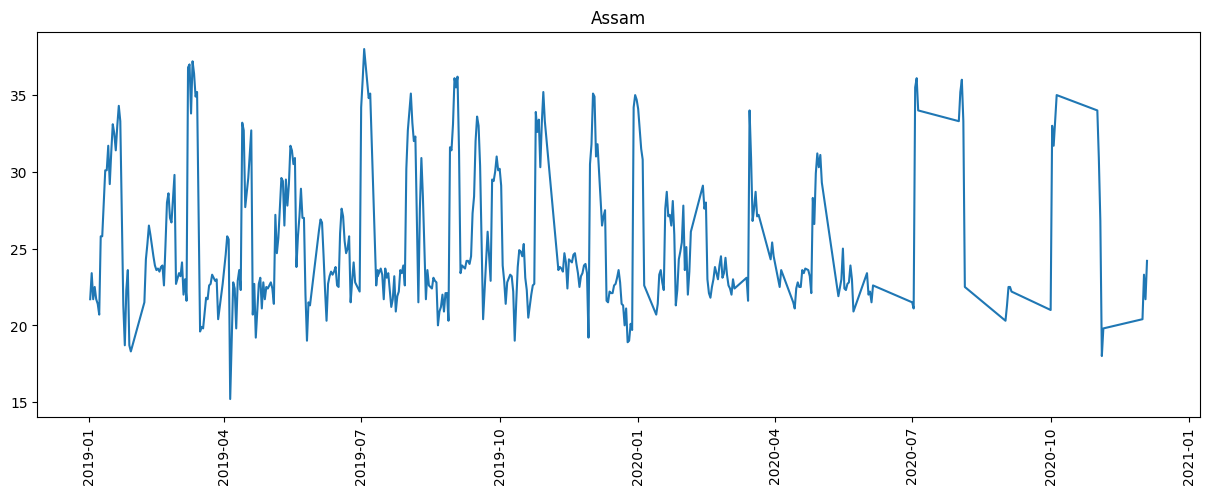

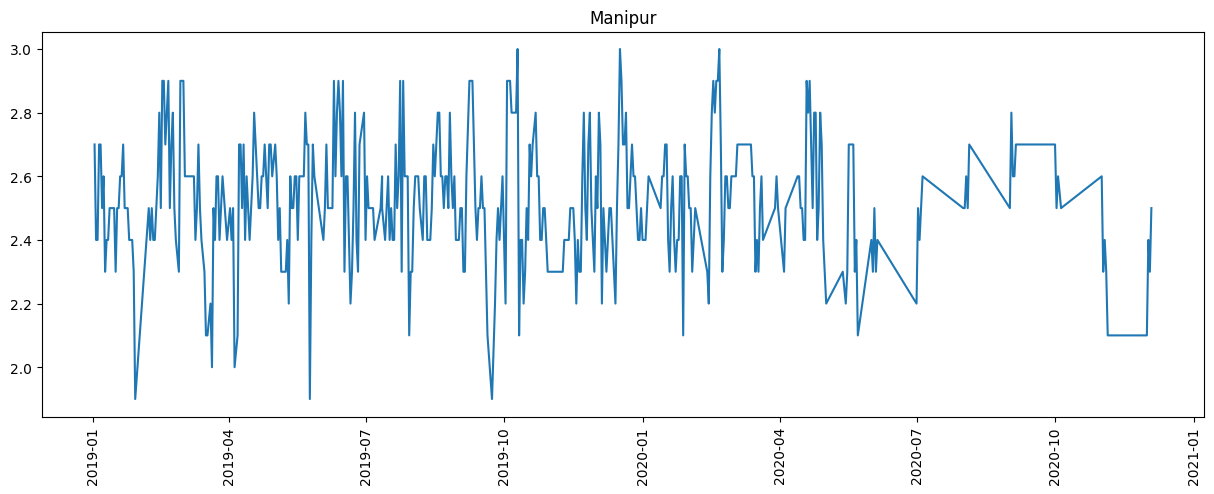

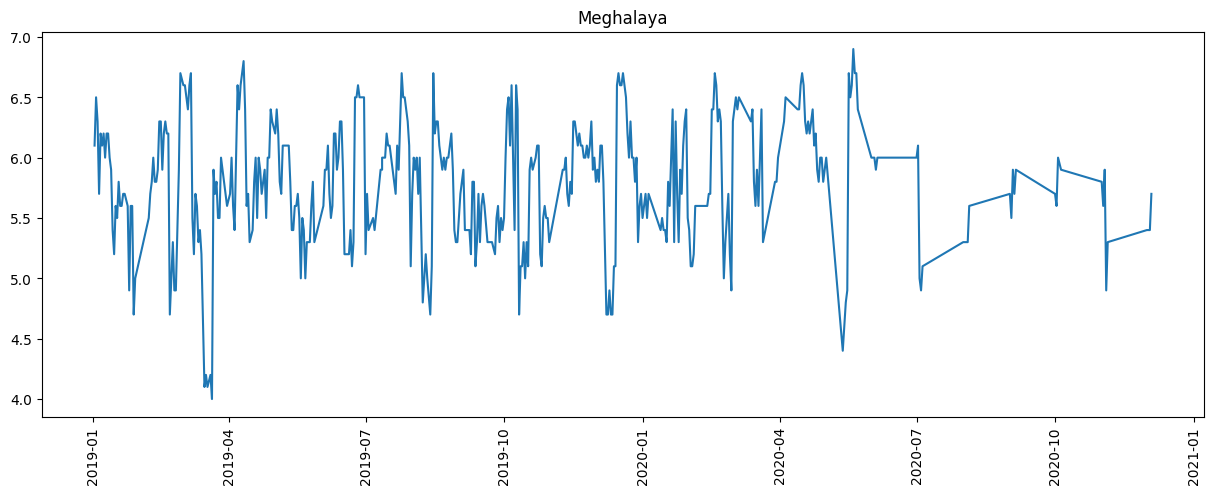

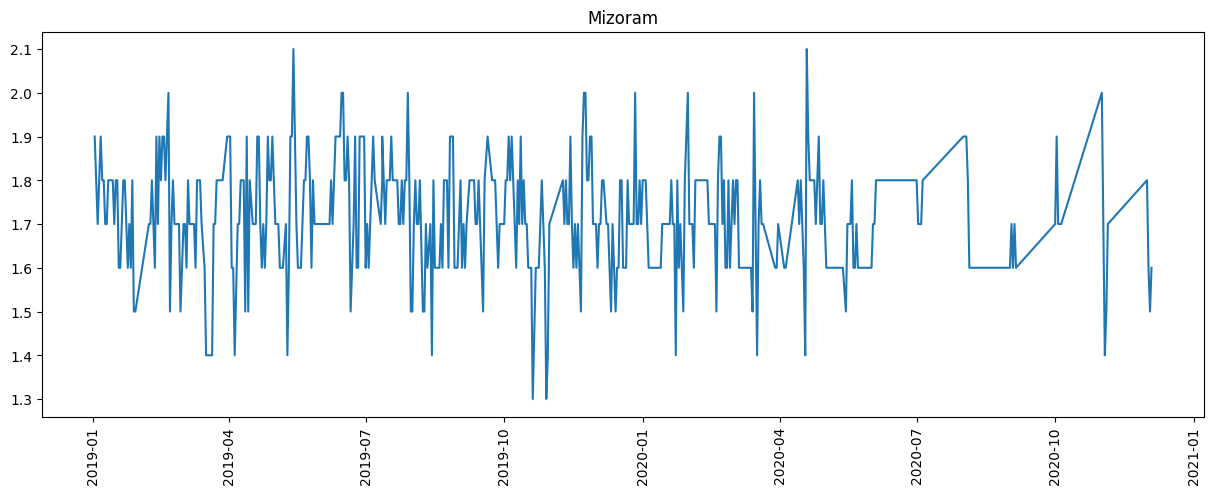

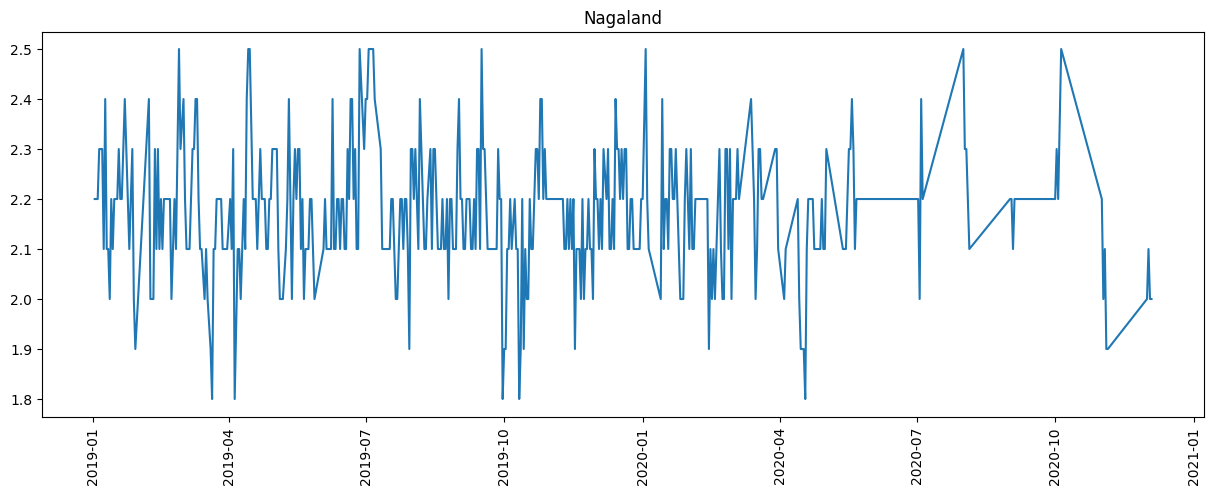

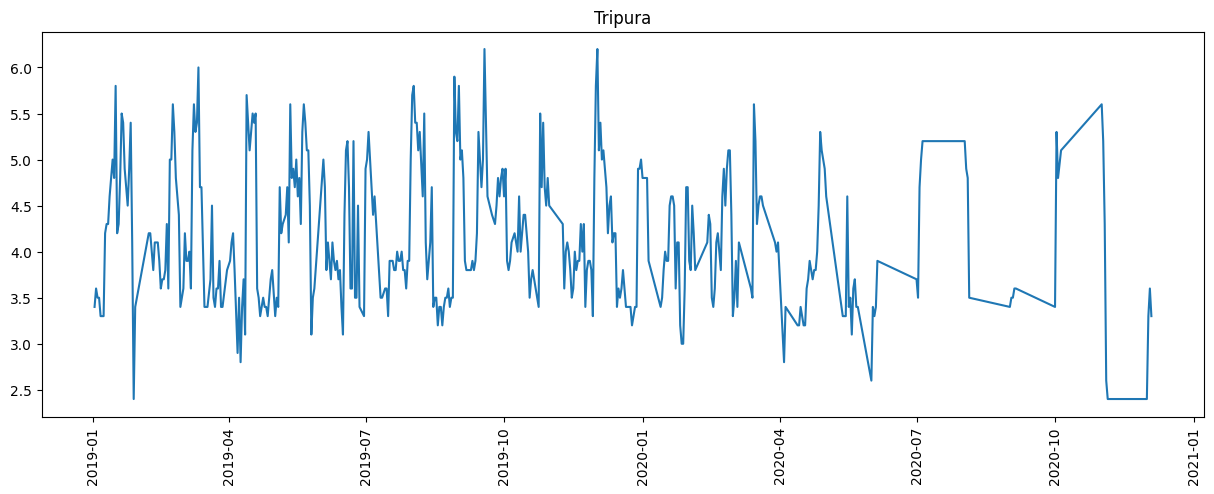

In [30]:
for c in df.columns:
  plt.rcParams["figure.figsize"] = (15, 5)
  plt.plot(df.index, df[c])
  plt.xticks(rotation=90)
  plt.title(c)
  plt.show()

In [31]:
df.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11',
               ...
               '2020-10-05', '2020-11-01', '2020-11-02', '2020-11-03',
               '2020-11-04', '2020-11-05', '2020-12-01', '2020-12-02',
               '2020-12-03', '2020-12-04'],
              dtype='datetime64[ns]', name='Dates', length=440, freq=None)